In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.impute import SimpleImputer
import keras
import seaborn as sns

In [81]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [82]:
# Load the UK-DALE dataset (replace 'your_dataset.csv' with the actual path)
df = pd.read_csv('/content/drive/MyDrive/DataSets/UK_DALE3.csv')

In [83]:
# Drop records where target RainTomorrow=NaN
df=df[pd.isnull(df['monitor'])==False]
df=df[pd.isnull(df['laptop'])==False]
df=df[pd.isnull(df['router'])==False]
df=df[pd.isnull(df['server'])==False]
df=df[pd.isnull(df['speakers'])==False]
# df=df[pd.isnull(df['aggregate'])==False]

# For other columns with missing values, fill them in with column mean
df=df.fillna(df.mean())

df

<ipython-input-83-2cd8926f0473>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


,null,Time,modem,cooker,rice_cooker,kettle,aggregate,monitor,laptop,router,...,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer
220,NaN,18-02-2013 00:17,NaN,NaN,NaN,NaN,366.557356,61.0,18.0,19.0,...,22.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,NaN,18-02-2013 00:17,NaN,NaN,NaN,NaN,366.557356,61.0,23.0,19.0,...,22.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,NaN,18-02-2013 00:17,NaN,NaN,NaN,NaN,366.557356,61.0,18.0,18.0,...,22.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,NaN,18-02-2013 00:17,NaN,NaN,NaN,NaN,366.557356,60.0,27.0,18.0,...,23.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,NaN,18-02-2013 00:18,NaN,NaN,NaN,NaN,366.557356,62.0,18.0,19.0,...,22.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048566,NaN,03-04-2013 02:44,NaN,NaN,NaN,NaN,366.557356,62.0,15.0,20.0,...,27.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048567,NaN,03-04-2013 02:45,NaN,NaN,NaN,NaN,527.000000,61.0,15.0,19.0,...,27.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048568,NaN,03-04-2013 02:45,NaN,NaN,NaN,NaN,524.000000,62.0,15.0,19.0,...,27.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,03-04-2013 02:45,NaN,NaN,NaN,NaN,521.000000,61.0,14.0,20.0,...,27.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Extract features and labels
features = df[['monitor', 'laptop', 'router', 'server', 'speakers']]
labels_appliance = df[['monitor', 'laptop', 'router', 'server', 'speakers']]  # Add more appliances as needed


In [85]:
# Encode the appliance labels separately for each column
label_encoder_appliance = LabelEncoder()
encoded_labels_appliance = labels_appliance.apply(lambda col: label_encoder_appliance.fit_transform(col))


In [ ]:
# Flatten the 2D array to 1D for each column
# encoded_labels_appliance_flat = encoded_labels_appliance.values.ravel()

In [86]:
# Split the data into training and testing sets
x_train, x_test, y_train_appliance, y_test_appliance = train_test_split(
    features, encoded_labels_appliance, test_size=0.2, random_state=42
)

In [87]:
# Verify the shapes
print("Shapes of Training Data:")
print(f"Input Features (x_train): {x_train.shape}")
for column in y_train_appliance.columns:
    print(f"Labels for {column} (y_train_{column}): {y_train_appliance[column].shape}")

print("\nShapes of Testing Data:")
print(f"Input Features (x_test): {x_test.shape}")
for column in y_test_appliance.columns:
    print(f"Labels for {column} (y_test_{column}): {y_test_appliance[column].shape}")

Shapes of Training Data:
Input Features (x_train): (285492, 5)
Labels for monitor (y_train_monitor): (285492,)
Labels for laptop (y_train_laptop): (285492,)
Labels for router (y_train_router): (285492,)
Labels for server (y_train_server): (285492,)
Labels for speakers (y_train_speakers): (285492,)

Shapes of Testing Data:
Input Features (x_test): (71373, 5)
Labels for monitor (y_test_monitor): (71373,)
Labels for laptop (y_test_laptop): (71373,)
Labels for router (y_test_router): (71373,)
Labels for server (y_test_server): (71373,)
Labels for speakers (y_test_speakers): (71373,)


In [88]:
# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [89]:
# # Impute missing values in features
# imputer = SimpleImputer(strategy='mean')  # Use 'median' or other strategies if needed

# # Fit and transform on training data
# x_train_scaled = imputer.fit_transform(x_train_scaled)

# # Transform the testing data using the same imputer
# x_test_scaled = imputer.transform(x_test_scaled)

# Check for missing or NaN values after imputation
missing_values_features_train = np.isnan(x_train_scaled).any()
missing_values_features_test = np.isnan(x_test_scaled).any()

print("Missing or NaN values in training features after imputation:", missing_values_features_train)
print("Missing or NaN values in testing features after imputation:", missing_values_features_test)

Missing or NaN values in training features after imputation: False
Missing or NaN values in testing features after imputation: False


In [90]:
# Create a neural network model with two hidden layers
input_layer = Input(shape=(x_train_scaled.shape[1],))
hidden_layer1 = Dense(64, activation='relu')(input_layer)
hidden_layer2 = Dense(32, activation='softmax')(hidden_layer1)
output_layer = Dense(encoded_labels_appliance.shape[1], activation='relu')(hidden_layer2)


In [91]:
# Combine the layers into a model
model = Model(inputs=input_layer, outputs=output_layer)

In [92]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [93]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 2629 (10.27 KB)
Trainable params: 2629 (10.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [94]:
# Check for missing or NaN values in features
missing_values_features_train = np.isnan(x_train_scaled).any()
missing_values_features_test = np.isnan(x_test_scaled).any()

# Check for missing or NaN values in labels
missing_values_labels_train = np.isnan(y_train_appliance).any()
missing_values_labels_test = np.isnan(y_test_appliance).any()

print("Missing or NaN values in training features:", missing_values_features_train)
print("Missing or NaN values in testing features:", missing_values_features_test)
print("Missing or NaN values in training labels:", missing_values_labels_train)
print("Missing or NaN values in testing labels:", missing_values_labels_test)


Missing or NaN values in training features: False
Missing or NaN values in testing features: False
Missing or NaN values in training labels: monitor     False
laptop      False
router      False
server      False
speakers    False
dtype: bool
Missing or NaN values in testing labels: monitor     False
laptop      False
router      False
server      False
speakers    False
dtype: bool


In [ ]:
# tf.config.run_functions_eagerly(True)


In [95]:
# Check shapes of training data and labels
print("Shape of x_train_scaled:", x_train_scaled.shape)
print("Shape of y_train_appliance:", y_train_appliance.shape)


Shape of x_train_scaled: (285492, 5)
Shape of y_train_appliance: (285492, 5)


In [96]:
# Train the model
history = model.fit(
    x_train_scaled, y_train_appliance,
    epochs=10, batch_size=None,
    validation_data=(x_test_scaled, y_test_appliance)
)

Epoch 1/10
8922/8922 [==============================] - 39s 4ms/step - loss: 85.2258 - accuracy: 0.9838 - val_loss: 83.8781 - val_accuracy: 0.9960
Epoch 2/10
8922/8922 [==============================] - 39s 4ms/step - loss: 83.5877 - accuracy: 0.9967 - val_loss: 83.9480 - val_accuracy: 0.9918
Epoch 3/10
8922/8922 [==============================] - 37s 4ms/step - loss: 83.6138 - accuracy: 0.9973 - val_loss: 83.8509 - val_accuracy: 0.9985
Epoch 4/10
8922/8922 [==============================] - 45s 5ms/step - loss: 83.6090 - accuracy: 0.9969 - val_loss: 83.9307 - val_accuracy: 0.9982
Epoch 5/10
8922/8922 [==============================] - 39s 4ms/step - loss: 83.6143 - accuracy: 0.9984 - val_loss: 83.9390 - val_accuracy: 0.9984
Epoch 6/10
8922/8922 [==============================] - 38s 4ms/step - loss: 83.6445 - accuracy: 0.9986 - val_loss: 83.9358 - val_accuracy: 0.9994
Epoch 7/10
8922/8922 [==============================] - 37s 4ms/step - loss: 83.6413 - accuracy: 0.9984 - val_loss: 83

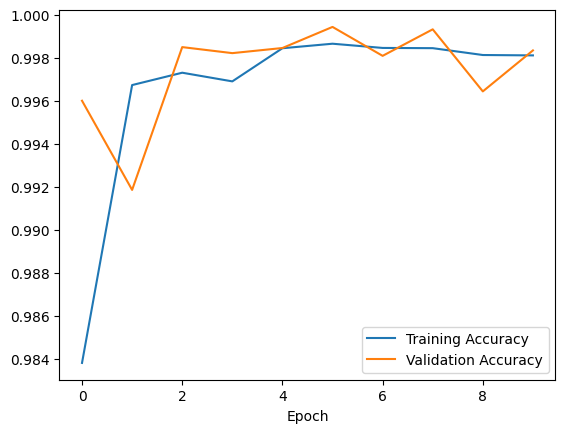

In [97]:
# Plot accuracy over training epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

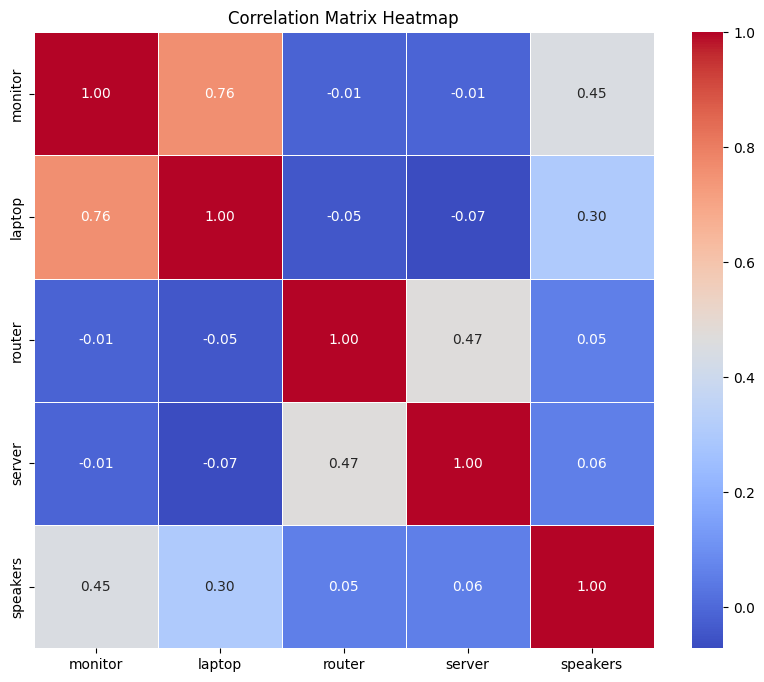

In [98]:
# Assuming 'features' is your DataFrame with appliance-related features
correlation_matrix = features.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'history' is the variable containing training history from model.fit()

# Plot accuracy over training epochs
plt.figure(figsize=(10, 6))

# Training Power MAE
plt.plot(history.history['output_power_mae'], label='Training Power MAE', linestyle='-', marker='o', color='blue')

# Validation Power MAE
plt.plot(history.history['val_output_power_mae'], label='Validation Power MAE', linestyle='-', marker='o', color='orange')

# Training Appliances Accuracy
plt.plot(history.history['output_appliances_accuracy'], label='Training Appliances Accuracy', linestyle='--', marker='x', color='green')

# Validation Appliances Accuracy
plt.plot(history.history['val_output_appliances_accuracy'], label='Validation Appliances Accuracy', linestyle='--', marker='x', color='red')

plt.xlabel('Epoch')
plt.ylabel('Accuracy / MAE')
plt.title('Training and Validation Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
